<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


このラボでは、データの視覚化に焦点を当てます。

データセットは、RDBMSの形で提供されます。

SQLクエリを使用して、必要なデータを抽出します。

## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


 - データの分布を視覚化します

 - 2つの機能間の関係を視覚化します

 - データの構成を視覚化します

 - データの比較を視覚化します


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
# !pip install pandas

In [2]:
# !pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
url =  'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.0})

# Load the data

df = pd.read_csv(url)

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



ヒストグラムを使用して、毎年の補償（「変換されたcompertedcompertearly」）の分布を視覚化します。

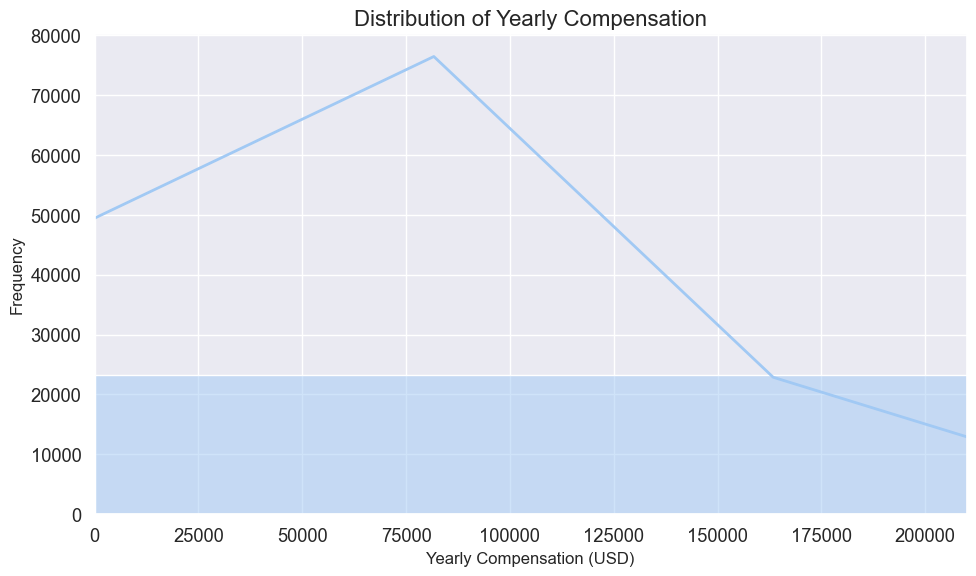

In [9]:
## Write your code here
# Filter out NaN values from ConvertedCompYearly
filtered_df = df.dropna(subset=['ConvertedCompYearly'])

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create the histogram with appropriate bins and styling
sns.histplot(data=filtered_df, x='ConvertedCompYearly', bins=30, kde=True)

# Add title and labels
plt.title('Distribution of Yearly Compensation', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Format x-axis to show currency in thousands/millions
plt.ticklabel_format(style='plain', axis='x')

# Improve readability by limiting x-axis to exclude extreme outliers
plt.xlim(0, filtered_df['ConvertedCompYearly'].quantile(0.95))

# Show the plot
plt.tight_layout()
plt.show()



##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



「Age」はデータセットのカテゴリーであるため、ボックスプロットの数値に変換します。


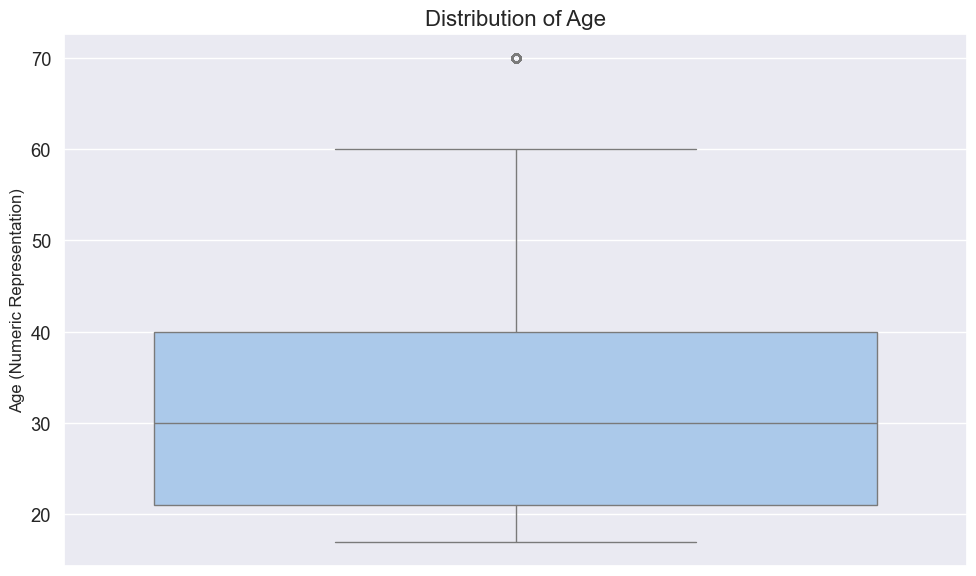

In [10]:
## Write your code here
# Define a mapping from categorical age ranges to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Create a new column with numeric age values
df['Age_numeric'] = df['Age'].map(age_mapping)

# Filter out NaN values
filtered_age_df = df.dropna(subset=['Age_numeric'])

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(data=filtered_age_df, y='Age_numeric')

# Add title and labels
plt.title('Distribution of Age', fontsize=16)
plt.ylabel('Age (Numeric Representation)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



年齢と補償の関係を探ります。

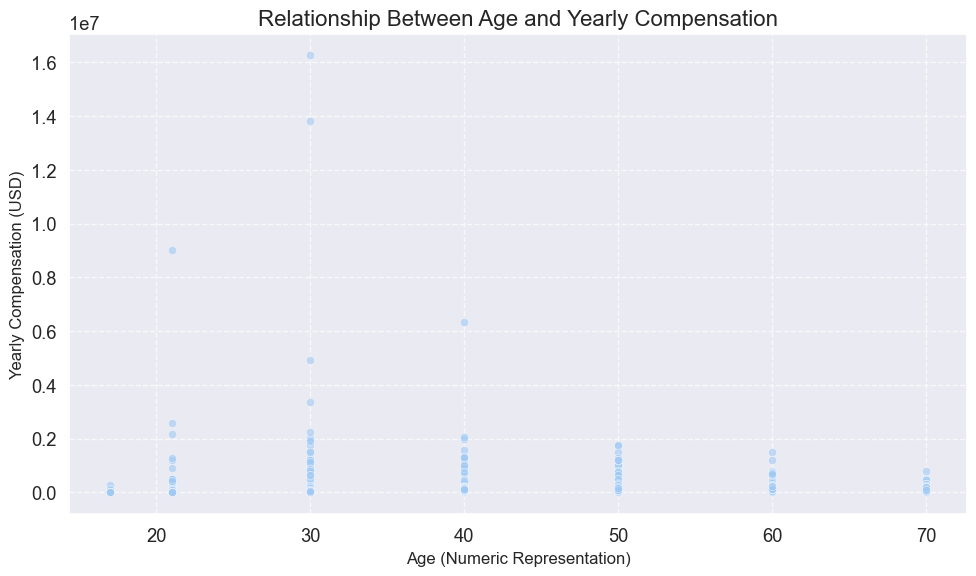

In [11]:
## Write your code here

# Filter out NaN values for both Age_numeric and ConvertedCompYearly
scatter_df = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=scatter_df, x='Age_numeric', y='ConvertedCompYearly', alpha=0.6)

# Add title and labels
plt.title('Relationship Between Age and Yearly Compensation', fontsize=16)
plt.xlabel('Age (Numeric Representation)', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


年齢がバブルサイズとして、補償と仕事の満足度がどのように関連しているかを調べてください。


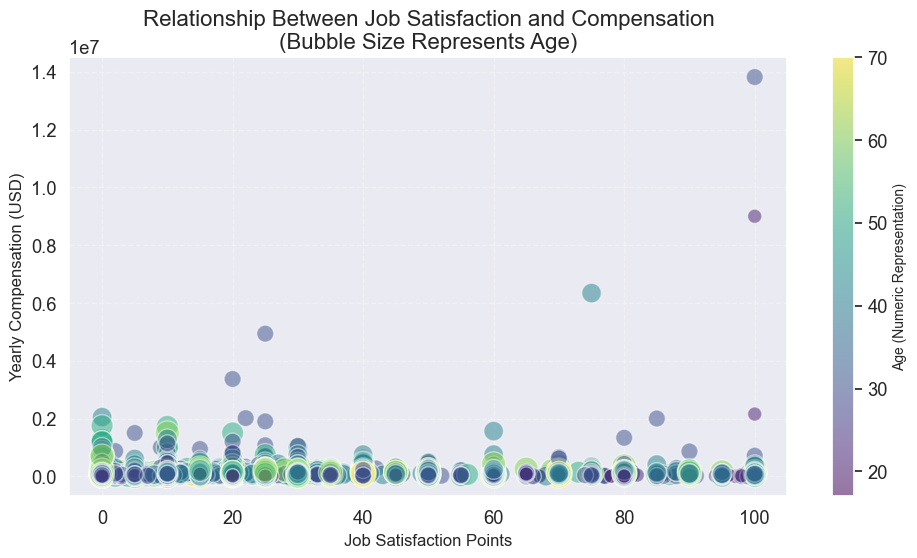

In [12]:
## Write your code here

# Filter out NaN values for ConvertedCompYearly, JobSatPoints_6, and Age_numeric
bubble_df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create the bubble plot
# x-axis: JobSatPoints_6 (job satisfaction)
# y-axis: ConvertedCompYearly (compensation)
# size: Age_numeric (age as bubble size)
scatter = plt.scatter(
    x=bubble_df['JobSatPoints_6'],
    y=bubble_df['ConvertedCompYearly'],
    s=bubble_df['Age_numeric'] * 5,  # Multiply by 5 to make bubbles more visible
    alpha=0.5,
    c=bubble_df['Age_numeric'],
    cmap='viridis',
    edgecolors='w'
)

# Add title and labels
plt.title('Relationship Between Job Satisfaction and Compensation\n(Bubble Size Represents Age)', fontsize=16)
plt.xlabel('Job Satisfaction Points', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)

# Add a colorbar to show the age scale
cbar = plt.colorbar(scatter)
cbar.set_label('Age (Numeric Representation)', fontsize=10)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()



### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



回答者の主な役割の分布を視覚化して、専門的な焦点を理解します。

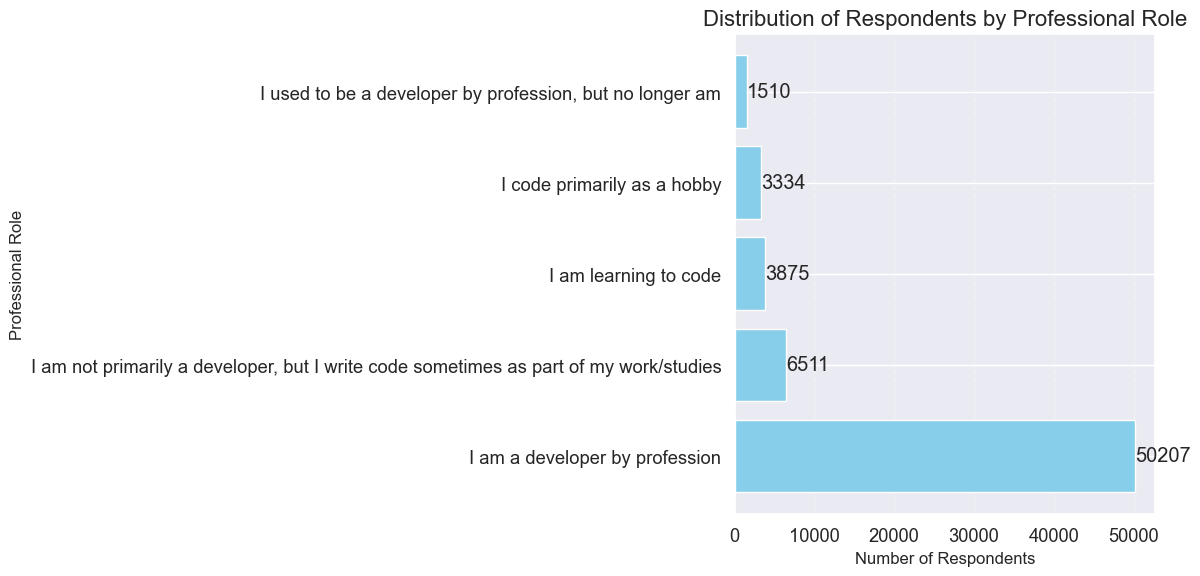

In [13]:
## Write your code here

# Count the distribution of MainBranch values
main_branch_counts = df['MainBranch'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(main_branch_counts.index, main_branch_counts.values, color='skyblue')

# Add data labels to the bars
for i, v in enumerate(main_branch_counts.values):
    plt.text(v + 5, i, str(v), va='center')

# Add title and labels
plt.title('Distribution of Respondents by Professional Role', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Professional Role', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.3, axis='x')

# Adjust layout and display
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



「Languagewanttoworkwith」に基づいて、最も望ましいプログラミング言語を特定します。

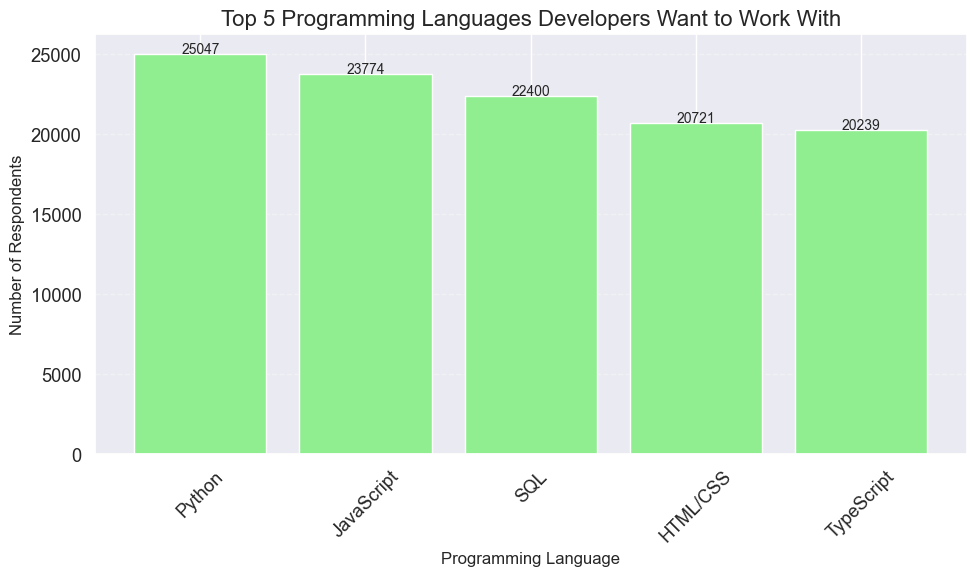

In [14]:
## Write your code here
# Extract and process LanguageWantToWorkWith data
# This column contains semicolon-separated values, so we need to split and count them
languages = []
for langs in df['LanguageWantToWorkWith'].dropna():
    languages.extend(langs.split(';'))

# Count occurrences of each language
language_counts = pd.Series(languages).value_counts()

# Get the top 5 languages
top_languages = language_counts.head(5)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_languages.index, top_languages.values, color='lightgreen')

# Add data labels on top of each bar
for i, v in enumerate(top_languages.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

# Add title and labels
plt.title('Top 5 Programming Languages Developers Want to Work With', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Adjust layout and display
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


さまざまな年齢層にわたって積み重ねられたバーチャートで仕事の満足度メトリックを比較します。

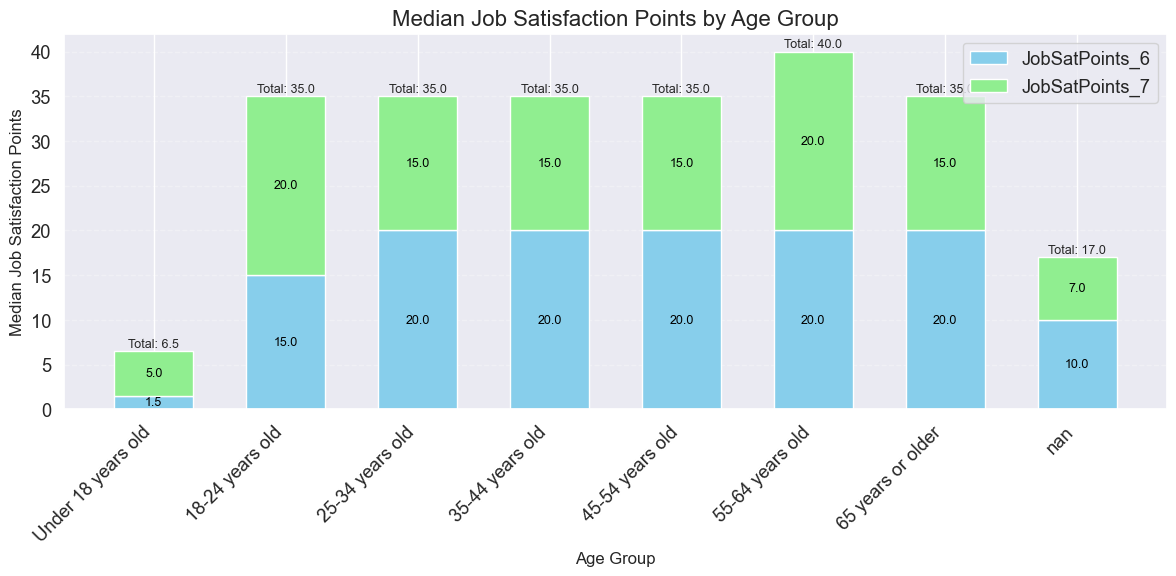

In [17]:
## Write your code here

# Filter out rows with NaN values in the relevant columns
filtered_df = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Age and calculate median of job satisfaction metrics
job_sat_by_age = filtered_df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Sort by age groups in a logical order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older']
job_sat_by_age['Age'] = pd.Categorical(job_sat_by_age['Age'], categories=age_order, ordered=True)
job_sat_by_age = job_sat_by_age.sort_values('Age')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Plot the stacked bars
bar_width = 0.6
bars1 = plt.bar(job_sat_by_age['Age'].astype(str), job_sat_by_age['JobSatPoints_6'], 
                bar_width, label='JobSatPoints_6', color='skyblue')
bars2 = plt.bar(job_sat_by_age['Age'].astype(str), job_sat_by_age['JobSatPoints_7'], 
                bar_width, bottom=job_sat_by_age['JobSatPoints_6'], 
                label='JobSatPoints_7', color='lightgreen')

# Add data labels
for i, (v1, v2) in enumerate(zip(job_sat_by_age['JobSatPoints_6'], job_sat_by_age['JobSatPoints_7'])):
    total = v1 + v2
    plt.text(i, v1/2, f'{v1:.1f}', ha='center', va='center', fontsize=9, color='black')
    plt.text(i, v1 + v2/2, f'{v2:.1f}', ha='center', va='center', fontsize=9, color='black')
    plt.text(i, total + 0.1, f'Total: {total:.1f}', ha='center', va='bottom', fontsize=9)

# Add title and labels
plt.title('Median Job Satisfaction Points by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Job Satisfaction Points', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Adjust layout and display
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



「データベースハーブワーク」を視覚化することにより、回答者の間で最も一般的に使用されているデータベースを特定します。


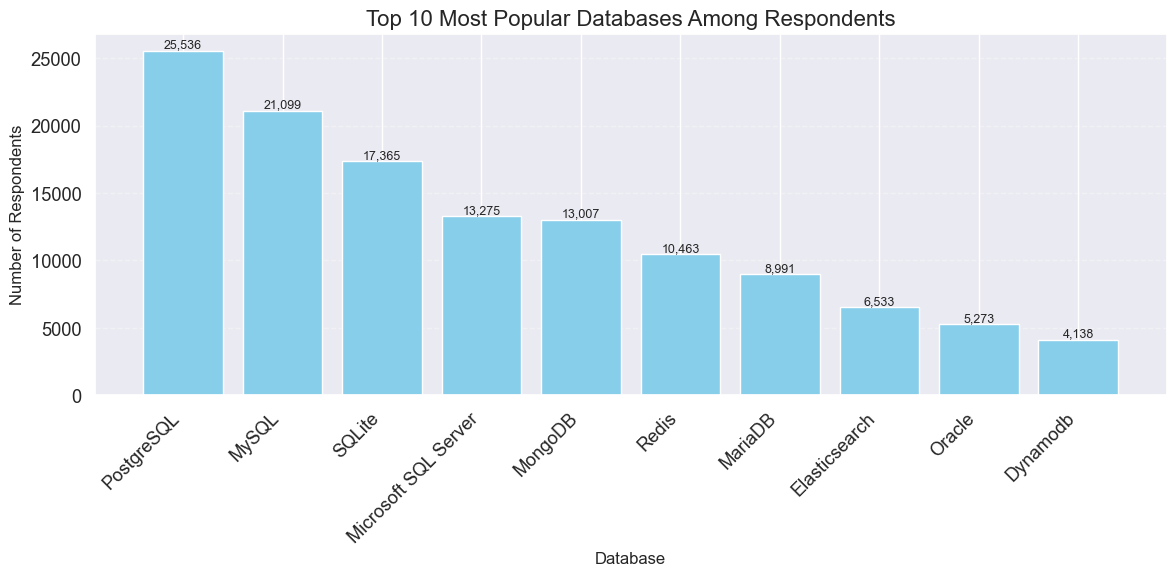

In [18]:
## Write your code here

# Process the DatabaseHaveWorkedWith column
# This column contains semicolon-separated values, so we need to split and count them
db_data = df['DatabaseHaveWorkedWith'].dropna()

# Split the semicolon-separated values and count occurrences
db_counts = {}
for dbs in db_data:
    for db in dbs.split(';'):
        if db in db_counts:
            db_counts[db] += 1
        else:
            db_counts[db] = 1

# Convert to DataFrame for easier plotting
db_df = pd.DataFrame({
    'Database': list(db_counts.keys()),
    'Count': list(db_counts.values())
})

# Sort by count in descending order
db_df = db_df.sort_values('Count', ascending=False).reset_index(drop=True)

# Take top 10 databases for better visualization
top_dbs = db_df.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_dbs['Database'], top_dbs['Count'], color='skyblue')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

# Add title and labels
plt.title('Top 10 Most Popular Databases Among Respondents', fontsize=16)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Adjust layout and display
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



グループ化されたバーチャートを使用して、複数の年齢層にわたる補償の中央値を比較します。

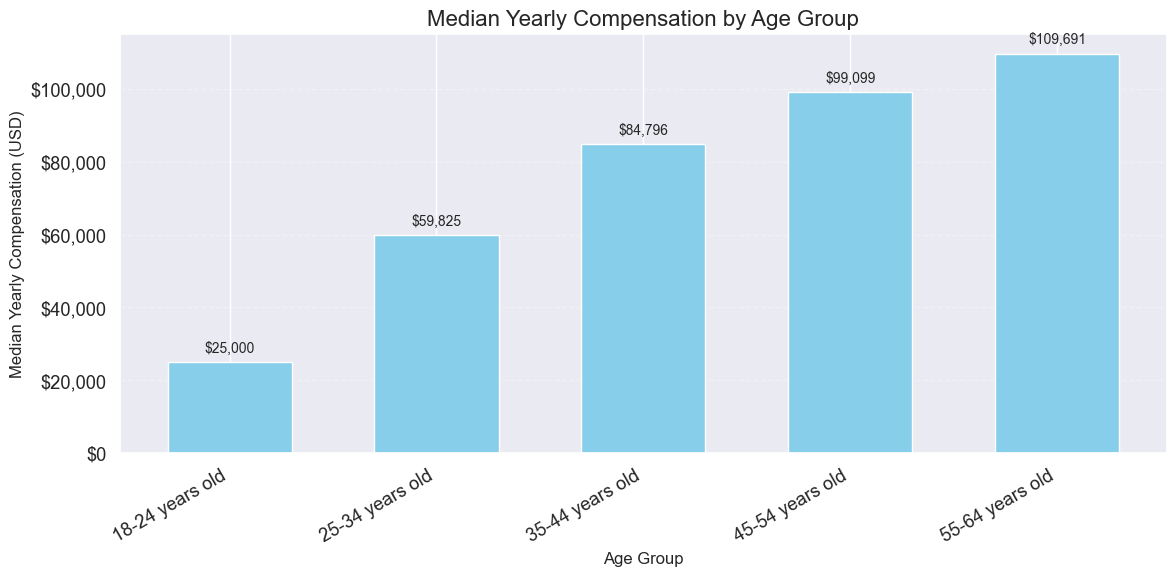

In [19]:
## Write your code here

# Filter out rows with missing values in ConvertedCompYearly and Age
filtered_df = df.dropna(subset=['ConvertedCompYearly', 'Age'])

# Define the age groups we want to analyze
age_groups = ['18-24 years old', '25-34 years old', '35-44 years old', 
              '45-54 years old', '55-64 years old']

# Filter the dataframe to include only these age groups
filtered_df = filtered_df[filtered_df['Age'].isin(age_groups)]

# Calculate median compensation for each age group
median_comp_by_age = filtered_df.groupby('Age')['ConvertedCompYearly'].median().reindex(age_groups)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(median_comp_by_age.index, median_comp_by_age.values, color='skyblue', width=0.6)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2000,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Median Yearly Compensation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Yearly Compensation (USD)', fontsize=12)
plt.xticks(rotation=30, ha='right')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Format y-axis with dollar signs and commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Adjust layout and display
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



どの地域が最も代表されているかを確認するために、国ごとの回答者の分布を示します。

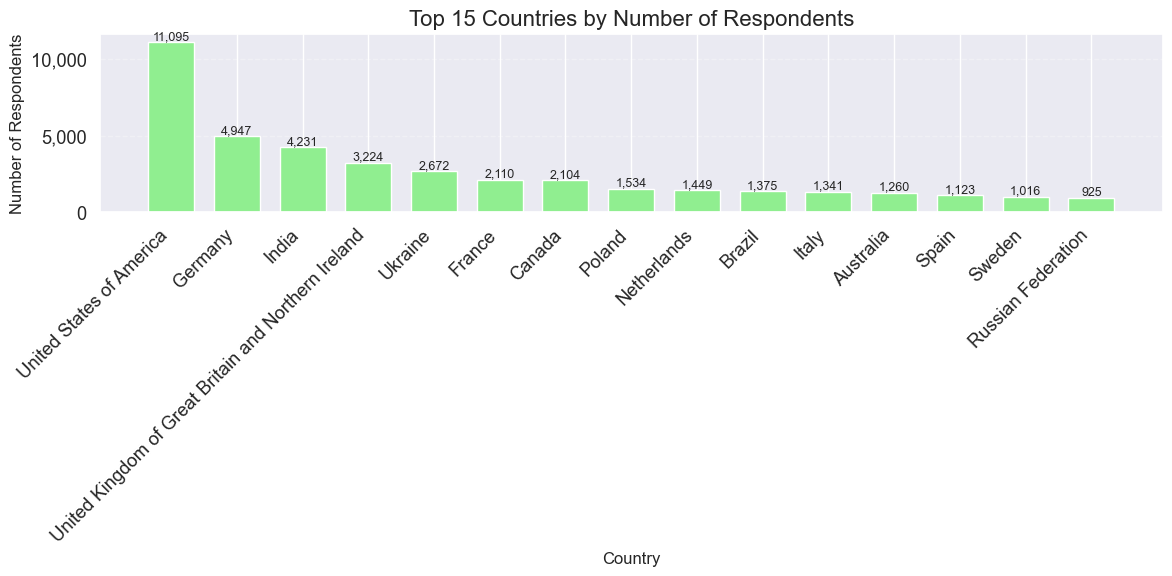

In [20]:
## Write your code here

# Count respondents by country
country_counts = df['Country'].value_counts().head(15)  # Get top 15 countries

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(country_counts.index, country_counts.values, color='lightgreen', width=0.7)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

# Add title and labels
plt.title('Top 15 Countries by Number of Respondents', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Format y-axis with commas for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust layout and display
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


このラボでは、さまざまな種類のバーチャートを作成および解釈する方法を示しているため、メインの専門分岐、プログラミング言語の好み、年齢層ごとの補償など、スタックオーバーフローデータセットのカテゴリデータの構成、比較、および分布を分析できます。バーチャートは、さまざまなカテゴリにわたってカウントと中央値を効果的に比較します。

## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
